<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 527 Homework 8

### Problem 0 (3 points)

## Part 1: Camera Transformations

### Problem 1.1 (Exam Style)

## Part 2: Epipolar Geometry 

### Problem 2.1 (Exam Style)

### Problem 2.2 (Exam Style)

### Problem 2.3 (Exam Style)

## Part 3: 3D Reconstruction

In [99]:
import urllib.request
import pickle
from os import path as osp


def retrieve(file_name, semester='spring21', homework=8):
    if osp.exists(file_name):
        print('Using previously downloaded file {}'.format(file_name))
    else:
        fmt = 'https://www2.cs.duke.edu/courses/{}/compsci527/homework/{}/{}'
        url = fmt.format(semester, homework, file_name)
        urllib.request.urlretrieve(url, file_name)
        print('Downloaded file {}'.format(file_name))

In [100]:
modules = ('geometry', 'camera', 'labels', 'longuet_higgins', 'rubik', 'experiments')
for module in modules:
    retrieve('{}.py'.format(module))

Using previously downloaded file geometry.py
Using previously downloaded file camera.py
Using previously downloaded file labels.py
Using previously downloaded file longuet_higgins.py
Using previously downloaded file rubik.py
Using previously downloaded file experiments.py


In [101]:
import numpy as np
from rubik import new_cube, draw_cube
from camera import print_camera
from labels import labels as lab
from experiments import camera_pair, standard_camera
from experiments import experiment, print_features, print_stats
import pickle
from matplotlib import pyplot as plt
%matplotlib inline

Extrinsic parameters:
	Origin (t): [115.47 115.47 115.47] mm
	Rotation matrix (R): 
		[-0.707  0.707  0.   ]
		[ 0.408  0.408 -0.816]
		[-0.577 -0.577 -0.577]

Intrinsic parameters:
	Focal distance (f): 8.585 mm
	Scaling (s): [200. 200.] pixels per mm
	Principal point (pi): [960. 540.] pixels


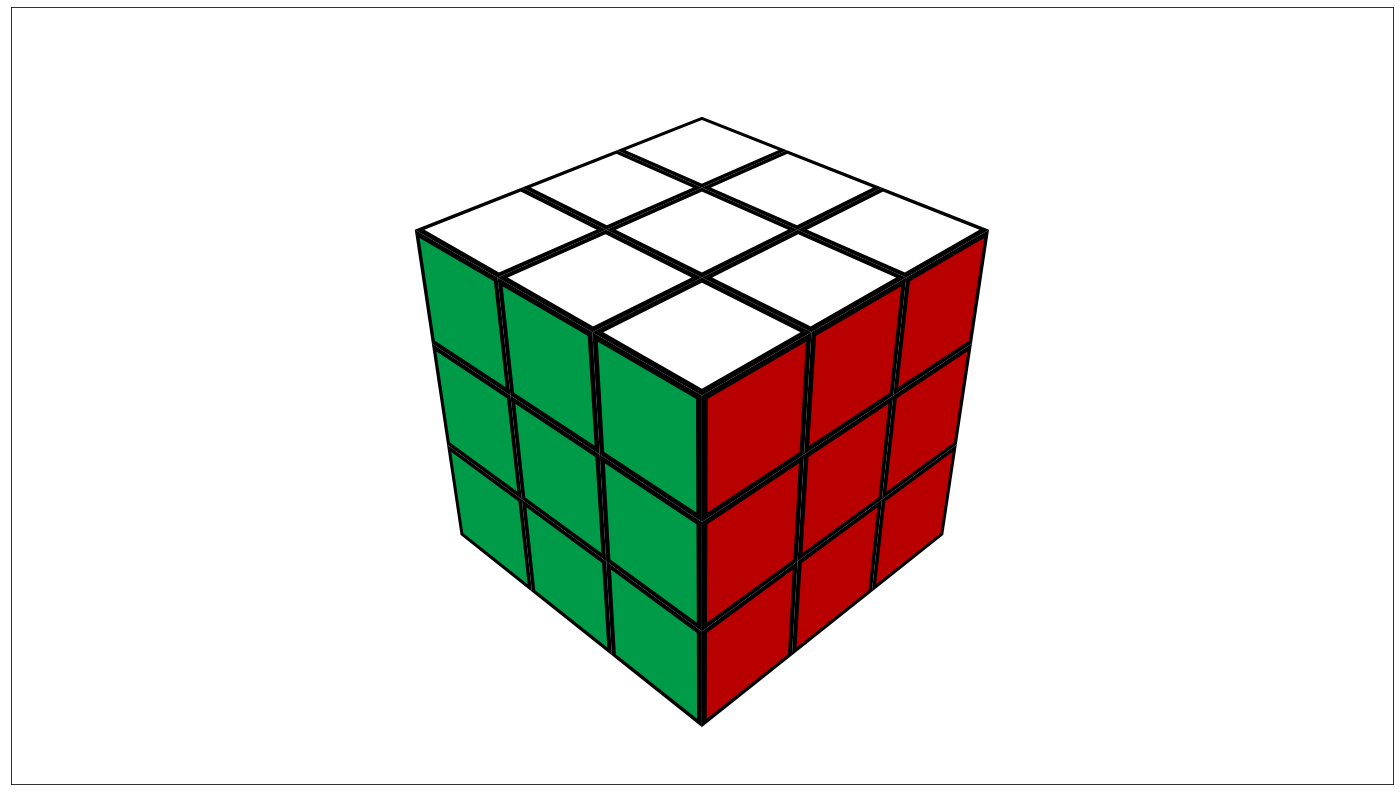

In [102]:
rubik = new_cube()
t_mm = 200. * np.ones(3) / np.sqrt(3.)
camera = standard_camera(t_mm)
print_camera(camera)
features = draw_cube(rubik, camera)

In [103]:
height_mm, circle_radius_mm = 100., 150.

vergence_degrees = 30.
stats_30 = experiment(rubik, omega_degrees=vergence_degrees,
                      height_mm=height_mm,
                      circle_radius_mm=circle_radius_mm,
                      sigma_pixels=1., repetitions=1, display=False)
print_stats(stats_30)

distance (mm): 180.278
vergence angle (degrees): 30.000
noise sigma (pixels): 1.000
translation error (degrees): median 0.628, median distance from median 0.000
rotation error (degrees): median 0.511, median distance from median 0.000
structure RMS error (baseline units): median 0.008, median distance from median 0.000


### Problem 3.1

### Problem 3.2 (Exam Style)

### Problem 3.3

## Part 4: Camera Calibration 

Using previously downloaded file circles.png


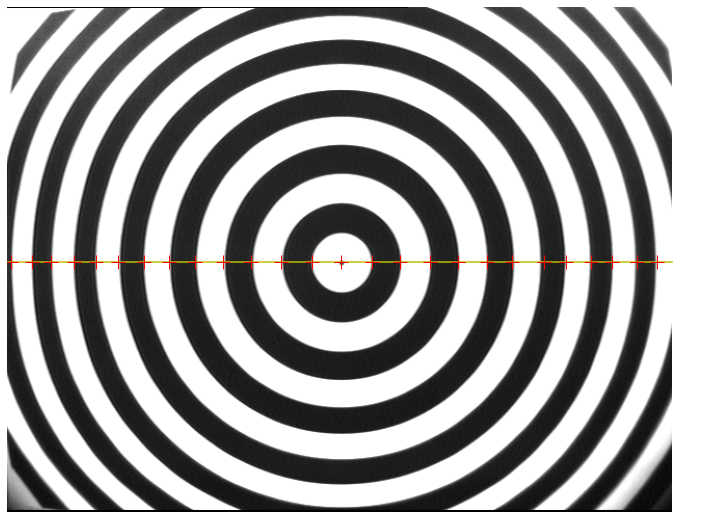

In [215]:
from imageio import imread

principal_point = np.array((321, 245))

def show_circles():
    fig, ax = plt.subplots(1, 1, figsize=(10, 7.6))
    plt.imshow(circles, cmap='gray')
    plt.plot([0, circles.shape[1]], 2 * [principal_point[1]], 'y')
    plt.axis('off')
    plt.tight_layout()
    x_vals = [3, 23, 42, 64, 85, 106, 131, 155, 180, 207, 234, 263, 293, 321, 351, 378, 407, 434, 462, 486, 516, 538, 562, 582, 606, 625]
    y_vals = np.repeat(principal_point[1], 26)
    plt.plot(x_vals, y_vals, linestyle="None", marker="+", color="red", markersize=14)
    return fig, ax

circles_name = 'circles.png'
retrieve(circles_name)
circles = imread(circles_name)
fig, ax = show_circles()

### Problem 4.1

In [105]:
retrieve('pick.py')

Using previously downloaded file pick.py


In [106]:
distorted = np.array((3, 23, 42, 64, 85, 106, 131, 155, 180, 207, 234, 263, 293, 321, 351, 378, 407, 434, 462, 486, 516, 538, 562, 582, 606, 625))

(<Figure size 720x547.2 with 1 Axes>, <AxesSubplot:>)

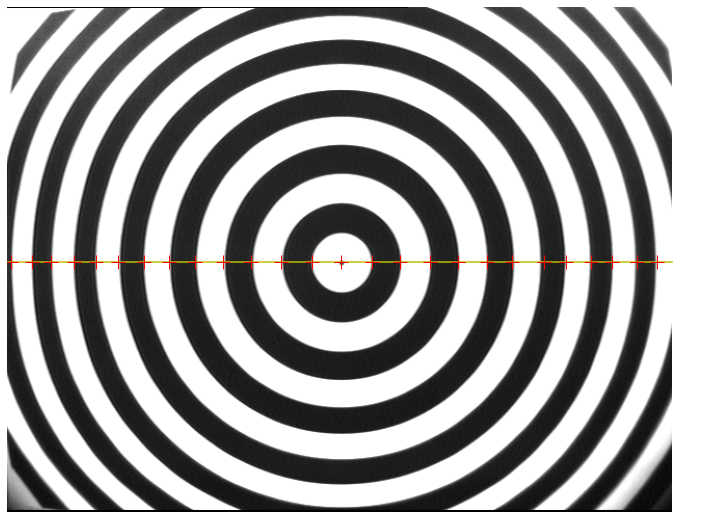

In [218]:
show_circles()

### Problem 4.2

In [107]:
def true_centered_coordinates(x, left_index, right_index):
    radius = np.round((x[right_index] - x[left_index]) / 2.)
    return np.arange(-13, 13) * radius

In [243]:
ideal_centered = true_centered_coordinates(distorted, 12, 14)

distorted_centered = distorted - principal_point[0]

print(ideal_centered)
print(distorted_centered)

d = distorted_centered - ideal_centered 

[-377. -348. -319. -290. -261. -232. -203. -174. -145. -116.  -87.  -58.
  -29.    0.   29.   58.   87.  116.  145.  174.  203.  232.  261.  290.
  319.  348.]
[-318 -298 -279 -257 -236 -215 -190 -166 -141 -114  -87  -58  -28    0
   30   57   86  113  141  165  195  217  241  261  285  304]


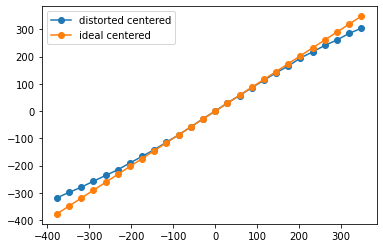

In [249]:
plt.plot(ideal_centered, distorted_centered, '-o') #distorted centered
plt.plot(ideal_centered, ideal_centered,'-o') #ideal centered
plt.legend({'ideal centered', 'distorted centered'})
plt.show()


This is barrel distortion, since distorted coordinates grow sub-linearly.

### Problem 4.3

In [115]:
def calibrate(distort, ideal):
    m = np.vstack([ideal.T, ideal.T**3, ideal.T**5]).T
    return np.linalg.lstsq(m,distort-ideal,None)

In [116]:
np.set_printoptions(precision=3)
k = calibrate(distorted_centered, ideal_centered)[0]
print(k)

[-3.132e-03 -1.345e-06  1.997e-12]


In [111]:
residual = distorted_centered-ideal_centered*(1+k[0]+k[1]*ideal_centered**2+k[2]*ideal_centered**4)

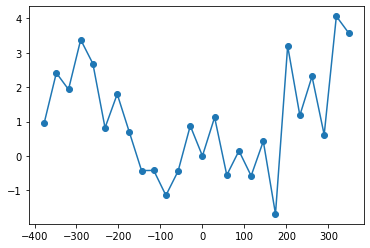

In [112]:
plt.plot(ideal_centered,residual,'-o')

### Problem 4.4

Using previously downloaded file lab.png


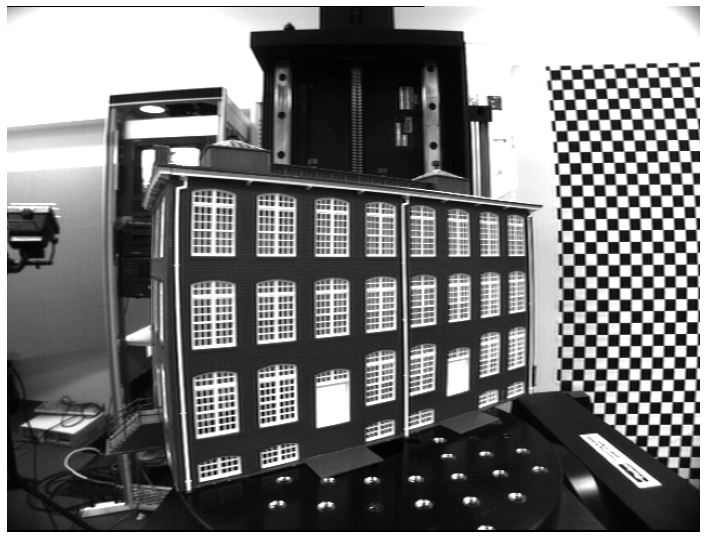

In [113]:
lab_name = 'lab.png'
retrieve(lab_name)
lab = imread(lab_name)

plt.figure(figsize=(10, 7.6))
plt.imshow(lab, cmap='gray')
plt.axis('off')
plt.tight_layout();

In [114]:
retrieve('interpolate.py')
from interpolate import interpolate

Using previously downloaded file interpolate.py


In [193]:
def undistort(image,k,center):
    y, x = np.meshgrid(np.arange(image.shape[0]), np.arange(image.shape[1]), indexing='ij')
    x = x-center[0]
    y = y-center[1]
    r = np.sqrt(x**2+y**2)
    delta = 1 + k[0] + k[1]*r**2 + k[2]*r**4
    xd = x*delta + center[0]
    yd = y*delta + center[1]
    
    return interpolate(xd, yd, image.astype(float))

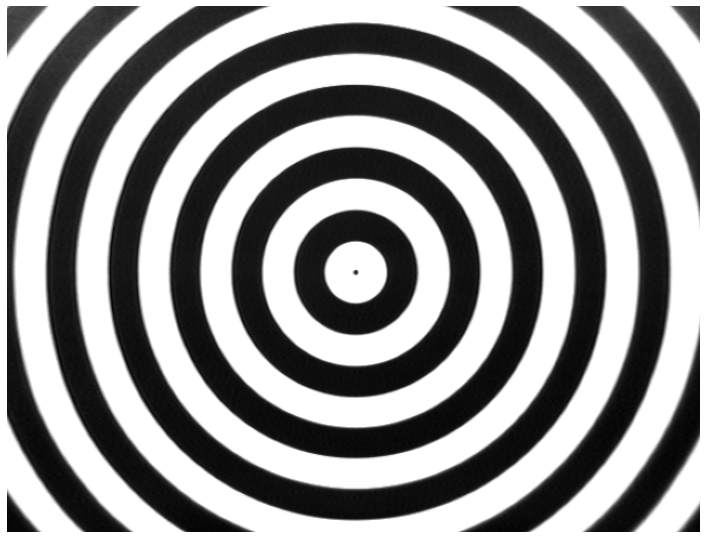

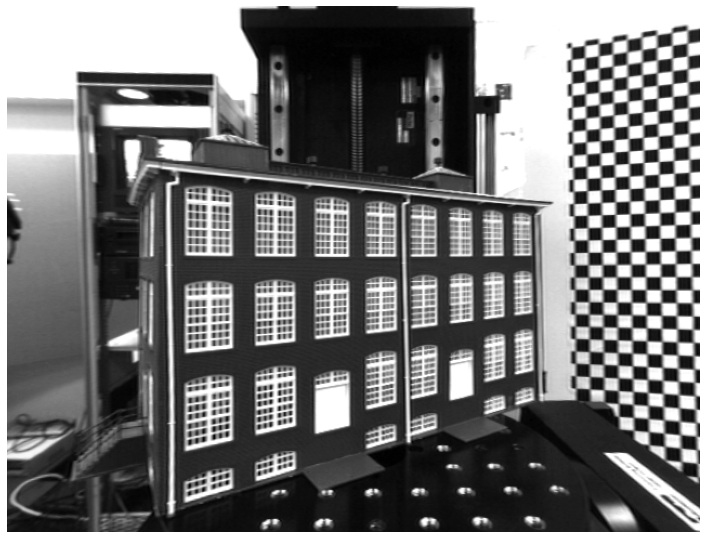

In [194]:
undis_circle = undistort(circles, k, principal_point)
undis_lab = undistort(lab, k, principal_point) 

plt.figure(figsize=(10, 7.6))
plt.imshow(undis_circle, cmap='gray')
plt.axis('off')
plt.tight_layout();

plt.figure(figsize=(10, 7.6))
plt.imshow(undis_lab, cmap='gray')
plt.axis('off')
plt.tight_layout();

